In [1]:
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter 
import scipy
import json
import torchvision.transforms.functional as F
from matplotlib import cm as CM
from image import *
from model import CSRNet
import torch
%matplotlib inline

In [2]:
from torchvision import datasets, transforms
transform=transforms.Compose([
                       transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225]),
                   ])

In [3]:
root = r'D:\data\ShanghaiTech_Crowd_Counting_Dataset'

In [4]:
#now generate the ShanghaiA's ground truth
part_A_train = os.path.join(root,'part_A_final/train_data','images')
part_A_test = os.path.join(root,'part_A_final/test_data','images')
part_B_train = os.path.join(root,'part_B_final/train_data','images')
part_B_test = os.path.join(root,'part_B_final/test_data','images')
path_sets = [part_A_test]

In [5]:
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

In [6]:
model = CSRNet()

In [7]:
model = model.cuda()

In [8]:
checkpoint = torch.load('0model_best.pth.tar')

In [9]:
model.load_state_dict(checkpoint['state_dict'])

In [16]:
mae = 0
for i in range(len(img_paths)):
    img = 255.0 * F.to_tensor(Image.open(img_paths[i]).convert('RGB'))

    img[0,:,:]=img[0,:,:]-92.8207477031
    img[1,:,:]=img[1,:,:]-95.2757037428
    img[2,:,:]=img[2,:,:]-104.877445883
    img = img.cuda()
    #img = transform(Image.open(img_paths[i]).convert('RGB')).cuda()
    gt_file = h5py.File(img_paths[i].replace('.jpg','.h5').replace('images','ground_truth'),'r')
    groundtruth = np.asarray(gt_file['density'])
    output = model(img.unsqueeze(0))
    mae += abs(output.detach().cpu().sum().numpy()-np.sum(groundtruth))
    print ('i: {}, mas :{}'.format(i,mae))
print(mae/len(img_paths))

i: 0, mas :3610.084716796875
i: 1, mas :9270.206298828125
i: 2, mas :12595.349609375
i: 3, mas :16007.84765625
i: 4, mas :18934.039794921875
i: 5, mas :22414.134521484375
i: 6, mas :33088.736083984375
i: 7, mas :36488.06689453125
i: 8, mas :56719.39501953125
i: 9, mas :57738.497314453125
i: 10, mas :60706.255859375
i: 11, mas :67022.18017578125
i: 12, mas :80971.22412109375
i: 13, mas :94113.78076171875
i: 14, mas :96569.57299804688
i: 15, mas :102042.70971679688
i: 16, mas :103024.7544555664
i: 17, mas :104541.88641357422
i: 18, mas :116837.22723388672
i: 19, mas :118664.43328857422
i: 20, mas :132955.21649169922
i: 21, mas :135693.3998413086
i: 22, mas :139796.86322021484
i: 23, mas :140341.37365722656
i: 24, mas :141814.88403320312
i: 25, mas :159237.04223632812
i: 26, mas :168837.45727539062
i: 27, mas :170452.6358642578
i: 28, mas :172400.85412597656
i: 29, mas :176495.43884277344
i: 30, mas :181495.90368652344
i: 31, mas :189761.19763183594
i: 32, mas :193090.55700683594
i: 33, m

Predicted Count :  383


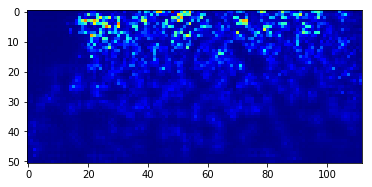

Original Count :  384


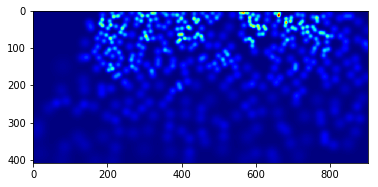

Original Image


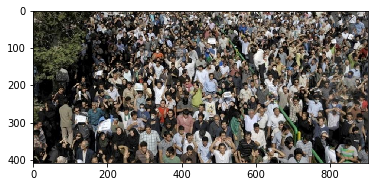

In [19]:
from matplotlib import cm as c
img = transform(Image.open(part_A_test+'/IMG_100.jpg').convert('RGB')).cuda()

output = model(img.unsqueeze(0))
print("Predicted Count : ",int(output.detach().cpu().sum().numpy()))
temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))
plt.imshow(temp,cmap = c.jet)
plt.show()
temp = h5py.File('D:/data/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/test_data/ground_truth/IMG_100.h5', 'r')
temp_1 = np.asarray(temp['density'])
plt.imshow(temp_1,cmap = c.jet)
print("Original Count : ",int(np.sum(temp_1)) + 1)
plt.show()
print("Original Image")
plt.imshow(plt.imread(part_A_test+'/IMG_100.jpg'))
plt.show()